In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#import dataset
data = pd.read_csv('Crop_Production.csv')
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,0
1,75,49,15,21.535741,71.509060,5.918264,102.485293,1
2,91,50,40,20.824771,84.134188,6.462392,230.224222,0
3,67,60,25,24.921622,66.786274,5.750255,109.216228,1
4,60,51,36,22.696578,82.810889,6.028322,256.996476,0
...,...,...,...,...,...,...,...,...
193,73,35,38,24.889212,81.979271,5.005307,185.946143,0
194,73,45,21,24.605322,73.588685,6.636803,96.591953,1
195,84,50,44,25.485920,81.406335,5.935344,182.654936,0
196,98,47,37,23.483813,81.332651,7.375483,224.058116,0


In [4]:
x = data.drop(['label'], axis=1)
x.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,75,49,15,21.535741,71.509060,5.918264,102.485293
2,91,50,40,20.824771,84.134188,6.462392,230.224222
3,67,60,25,24.921622,66.786274,5.750255,109.216228
4,60,51,36,22.696578,82.810889,6.028322,256.996476


In [5]:
y = data['label']
y

0      0
1      1
2      0
3      1
4      0
      ..
193    0
194    1
195    0
196    0
197    0
Name: label, Length: 198, dtype: int64

In [6]:
#For Scaled value
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
x

array([[0.75      , 0.28      , 0.93333333, ..., 0.90007948, 0.52308439,
        0.59806135],
       [0.375     , 0.56      , 0.        , ..., 0.54660047, 0.31886251,
        0.17583901],
       [0.775     , 0.6       , 0.83333333, ..., 0.97187701, 0.5089065 ,
        0.71276384],
       ...,
       [0.6       , 0.6       , 0.96666667, ..., 0.87998949, 0.32482814,
        0.51281594],
       [0.95      , 0.48      , 0.73333333, ..., 0.87750743, 0.82781595,
        0.68684586],
       [0.75      , 0.44      , 0.9       , ..., 0.88148108, 0.87229505,
        0.79623719]])

In [7]:
#Splitting the dataset into training and testing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state = 1)
knn = KNeighborsClassifier(n_neighbors= 1)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=1)

In [8]:
ypred = knn.predict(xtest)
ypred

array([0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [9]:
ytest

175    0
40     0
34     1
90     1
145    1
182    0
95     1
4      0
29     0
167    0
53     1
18     1
11     0
161    1
147    0
117    0
105    0
35     0
110    1
58     0
51     0
16     1
44     1
93     1
31     0
184    1
38     1
28     1
171    1
27     1
47     1
164    1
59     1
143    1
148    1
122    0
136    1
176    1
78     1
118    1
Name: label, dtype: int64

In [10]:
from sklearn.metrics import confusion_matrix, classification_report

In [11]:
#Final Report
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))

[[15  0]
 [ 0 25]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        25

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [15]:
#To get the best value for k using Grid search
from sklearn.model_selection import GridSearchCV 
from sklearn import neighbors
params = {'n_neighbors':[3,5,7,9]} 
knn = neighbors.KNeighborsRegressor() 
model = GridSearchCV(knn, params, cv=5) 
model.fit(xtrain,ytrain) 
model.best_params_

{'n_neighbors': 3}

In [39]:
# Loop over K values

neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i, k in enumerate(neighbors):
     
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(xtrain, ytrain)
    test_accuracy[i] = knn.score(xtest, ytest)

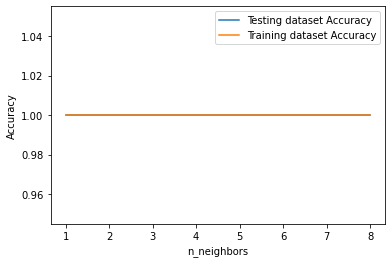

In [36]:
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()